### Bandpass Intervals

4 - 8 Hz 

8- 13 Hz

8 - 25 Hz


In [1]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
%run "../../functions/bandpass.ipynb"
%run "../../functions/get_data.ipynb"
%run "../../functions/trimmer.ipynb"
%run "../../functions/training.ipynb"

# DATA PREPROCESSING AND FILTERING

In [8]:
folder_path = '../../data/initial_data/walk_inst_clean/'
file_list = get_file_list(folder_path)

print(file_list)

['../../data/initial_data/walk_inst_clean/P_1.mat', '../../data/initial_data/walk_inst_clean/P_10.mat', '../../data/initial_data/walk_inst_clean/P_2.mat', '../../data/initial_data/walk_inst_clean/P_3.mat', '../../data/initial_data/walk_inst_clean/P_4.mat', '../../data/initial_data/walk_inst_clean/P_5.mat', '../../data/initial_data/walk_inst_clean/P_9.mat', '../../data/initial_data/walk_inst_clean/S_1.mat', '../../data/initial_data/walk_inst_clean/S_10.mat', '../../data/initial_data/walk_inst_clean/S_2.mat', '../../data/initial_data/walk_inst_clean/S_3.mat', '../../data/initial_data/walk_inst_clean/S_4.mat', '../../data/initial_data/walk_inst_clean/S_5.mat', '../../data/initial_data/walk_inst_clean/S_9.mat']


In [20]:
X, Y = get_data(file_list)

Here we would need to go through the EEg signals individualyy and kick out the discontiuities and the bad channels, just like we did in the other files for the toehr datasets.

In [22]:
kick_out = [(3, [23]), (4, [34, 43]), (7, [5, 32]), (12, [22])]

file_dict = {0: 'P_1', 1: 'P_10', 2: 'P_2', 3: 'P_3', 4: 'P_4', 5: 'P_5', 6: 'P_9', 7: 'S_1', 8: 'S_10', 
             9: 'S_2', 10: 'S_3', 11: 'S_4', 12: 'S_5', 13: 'S_9'}

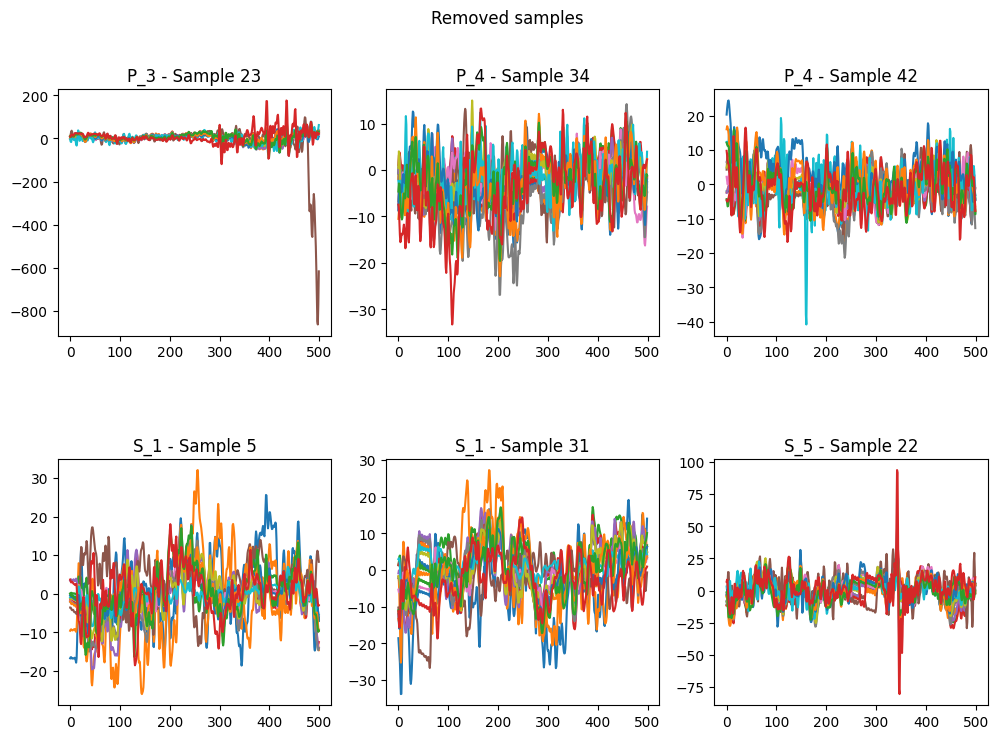

In [24]:
new_X, new_Y = trim_manually(kick_out, X, Y, file_dict, print_out=True)  

# BANDPASS FILTERING

In [25]:
fs = 250

In [26]:
filtered_data_4_8 = []
filtered_data_8_13 = []
filtered_data_8_25 = []
filtered_data_13_20 = []
filtered_data_20_28 = []
for x in new_X:
    filtered_x_4_8 = bandpass_filter(x, fs, 4, 8)
    filtered_x_8_13 = bandpass_filter(x, fs, 8, 13)
    filtered_x_8_25 = bandpass_filter(x, fs, 8, 25)
    filtered_x_13_20 = bandpass_filter(x, fs, 13, 20)
    filtered_x_20_28 = bandpass_filter(x, fs, 20, 28)
    filtered_data_13_20.append(filtered_x_13_20)
    filtered_data_20_28.append(filtered_x_20_28)
    filtered_data_4_8.append(filtered_x_4_8)
    filtered_data_8_13.append(filtered_x_8_13)
    filtered_data_8_25.append(filtered_x_8_25)

Print before and after visualisation of a random eeg signal

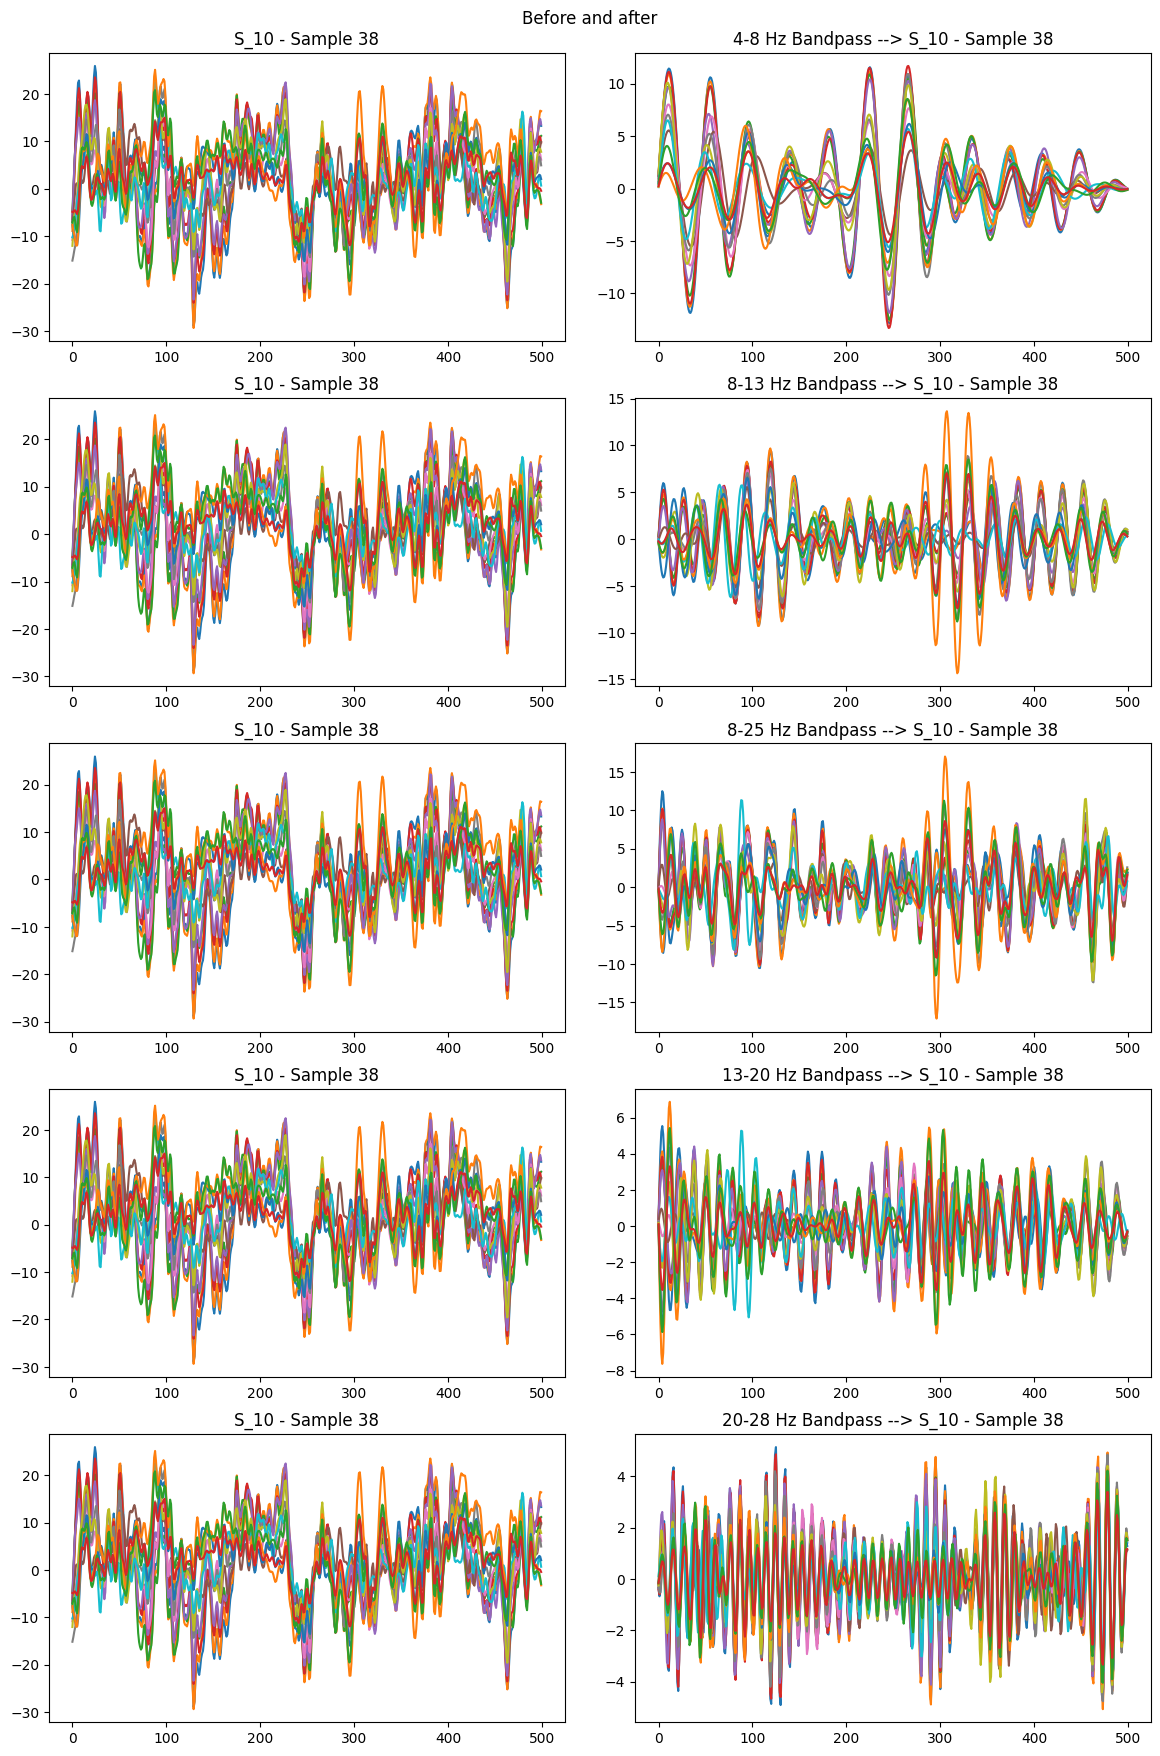

In [27]:
file_index = np.random.randint(0, 13)
sample_index = np.random.randint(0, new_X[file_index].shape[0])

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
fig.suptitle('Before and after')
fig.tight_layout(pad=2.0)

plot_sample(new_X[file_index], sample_index, axes[0, 0], file_dict[file_index])
plot_sample(filtered_data_4_8[file_index], sample_index, axes[0, 1], "4-8 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[1, 0], file_dict[file_index])
plot_sample(filtered_data_8_13[file_index], sample_index, axes[1, 1], "8-13 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[2, 0], file_dict[file_index])
plot_sample(filtered_data_8_25[file_index], sample_index, axes[2, 1], "8-25 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[3, 0], file_dict[file_index])
plot_sample(filtered_data_13_20[file_index], sample_index, axes[3, 1], "13-20 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[4, 0], file_dict[file_index])
plot_sample(filtered_data_20_28[file_index], sample_index, axes[4, 1], "20-28 Hz Bandpass --> " + file_dict[file_index])

# TRAINING ON THE FILTERED DATA

In [28]:
scroll_style = """
<style>
.output {
    overflow-y: scroll;
    max-height: 300px; /* Adjust the height as per your preference */
}
</style>
"""

In [29]:
kernels, chans, samples = 1, 14, 500

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_4_8, new_Y, "../results/walk_instr_clean/4_8_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/walk_instr_clean/4_8_Hz.txt")

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_8_13, new_Y, "../results/walk_instr_clean/8_13_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/walk_instr_clean/8_13_Hz.txt")

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_8_25, new_Y, "../results/walk_instr_clean/8_25_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/walk_instr_clean/8_25_Hz.txt")